In [2]:
import transformers
import datasets
import shap
import numpy as np
import torch
import config as cf
import model 
import re

cf.XMaxLen = 300
cf.YList = [1,0]
cf.Learning_Rate = 0.0005
cf.Dropout_Rate = 0.1

[cf.embedding, cf.word2id] = cf.Pickle_Read('../w2v/glove.300d.en.txt.pickle')
model_x = model.TextCNN()
model_x = model_x.cuda()
model_x.load_state_dict(torch.load('../TextCNNAmazonNormalxinit.pt'))


hello world
 []
hello world
... ['', '', '']
hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']


Partition explainer: 3it [00:37, 18.88s/it]               

hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']
hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']


.values =
array([[[-0.01500283,  0.18536219],
        [ 0.20376716, -0.14793512],
        [-0.13410738,  0.1524265 ],
        [-0.32029127,  0.05876433],
        [-0.05804589,  0.01129501],
        [ 0.01377444,  0.24858355]],

       [[-0.21175436,  0.12770007],
        [-0.04907261, -0.13572298],
        [-0.00296359,  0.0384898 ],
        [-0.07681719,  0.14447043],
        [-0.14842903,  0.2537931 ],
        [-0.16979935,  0.1291225 ]]])

.base_values =
array([[ 0.25567409,  0.02930069],
       [ 0.08108182, -0.09849578]])

.data =
(array(['hello ', 'world ', 'this ', 'is ', 'a ', 'test'], dtype=object), array(['hello ', 'world ', 'this ', 'is ', 'a ', 'test'], dtype=object))

In [4]:
def custom_tokenizer(s, return_offsets_mapping=True):

    pos = 0
    offset_ranges = []
    input_ids = []
    print("hello world")
    for m in re.finditer(r"\W", s):
        start, end = m.span(0)
        # if start+3 < len(s):
        #     start = start+3
        offset_ranges.append((pos, start-1))
        input_ids.append(s[pos:start])
        pos = end
    if pos != len(s):
        offset_ranges.append((pos, len(s)))
        input_ids.append(s[pos:])
    print(s, input_ids)
    out = {}
    out["input_ids"] = input_ids
    if return_offsets_mapping:
        out["offset_mapping"] = offset_ranges
    return out
masker = shap.maskers.Text(custom_tokenizer)
# masker = shap.maskers.Text(r"\W")
explainer = shap.Explainer(model_x, masker)
data = ["hello world this is a test", "hello world this is a test"]
explainer(data)

hello world
 []
hello world
... ['', '', '']
hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']


Partition explainer: 3it [00:12,  6.24s/it]               

hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']
hello world
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']


.values =
array([[[ 0.07121147,  0.04137075],
        [ 0.24170102, -0.24391077],
        [ 0.05639046, -0.0148148 ],
        [-0.09701202,  0.15987625],
        [-0.25186361,  0.2104014 ],
        [-0.33294929, -0.01174286]],

       [[ 0.00163862,  0.14662858],
        [ 0.10405222, -0.13426317],
        [ 0.01635346, -0.06070802],
        [-0.16864498, -0.09466431],
        [-0.24504213,  0.08523159],
        [-0.19298139, -0.1900165 ]]])

.base_values =
array([[0.15043513, 0.01685207],
       [0.06442902, 0.06021051]])

.data =
(array(['hello ', 'world ', 'this ', 'is ', 'a ', 'test'], dtype=object), array(['hello ', 'world ', 'this ', 'is ', 'a ', 'test'], dtype=object))

In [53]:
def custom_tokenizer(s, return_offsets_mapping=True):

    pos = 0
    offset_ranges = []
    input_ids = []
    print("hello world")
    for m in re.finditer(r"\W", s):
        start, end = m.span(0)
        print(m)
        offset_ranges.append((pos, start))
        input_ids.append(s[pos:start])
        pos = end
    if pos != len(s):
        offset_ranges.append((pos, len(s)))
        input_ids.append(s[pos:])
    print(s, input_ids)
    out = {}
    out["input_ids"] = input_ids
    if return_offsets_mapping:
        out["offset_mapping"] = offset_ranges
    return out
custom_tokenizer("hello world this is a test")

hello world
<re.Match object; span=(5, 6), match=' '>
<re.Match object; span=(11, 12), match=' '>
<re.Match object; span=(16, 17), match=' '>
<re.Match object; span=(19, 20), match=' '>
<re.Match object; span=(21, 22), match=' '>
hello world this is a test ['hello', 'world', 'this', 'is', 'a', 'test']


{'input_ids': ['hello', 'world', 'this', 'is', 'a', 'test'],
 'offset_mapping': [(0, 5), (6, 11), (12, 16), (17, 19), (20, 21), (22, 26)]}

In [6]:
shap.plots.text(shap_values[:,:,"POSITIVE"])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


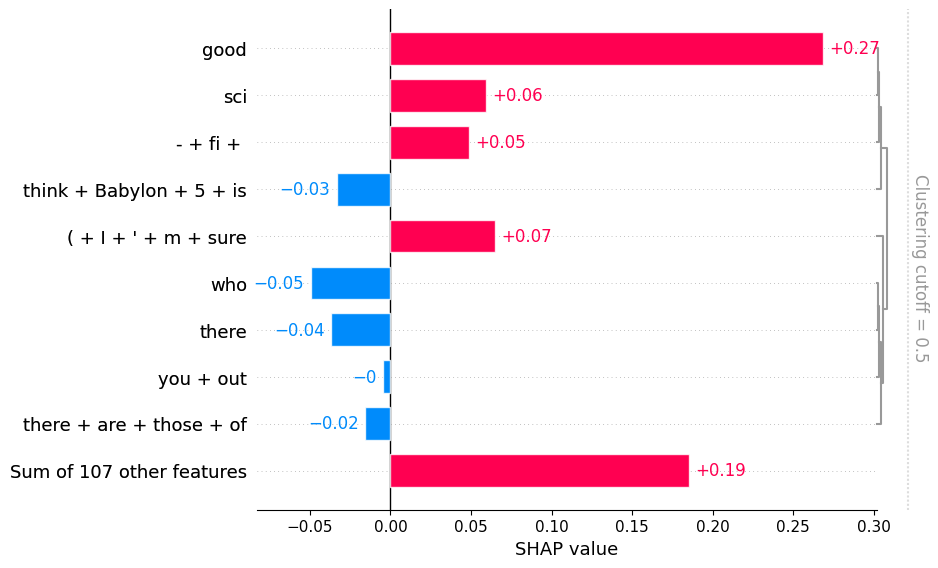

In [9]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])


In [15]:
text = "the quick brown fox jumps over the lazy dog"
    trigrams = data_process.split_into_ngrams(text, 3)
    expected_trigrams = [('the', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]
 

In [1]:
def split_into_ngrams(text, n):
    # Split the text into words
    words = text.split()

    # Create a list to store the n-grams
    ngrams = []

    # Loop through the words and create n-grams
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)

    return ngrams

In [5]:
text = "the quick brown fox jumps over the lazy dog"
# expected_trigrams = [('the', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]
stereotype_words = {'the quick brown', 'brown fox jumps'}

In [8]:
n = 3
ngrams = split_into_ngrams(text, n)
mask = "[MASK]"
text_tokens = [mask]*len(text.split())
for index, ngram in enumerate(ngrams):
    if ngram in stereotype_words:
        text_tokens[index:index+3] = ngram.split()
print(text_tokens)

['the', 'quick', 'brown', 'fox', 'jumps', '[MASK]', '[MASK]', '[MASK]', '[MASK]']


In [15]:
import re

def skip_n_bigram_tokenizer(s, n=0, return_offsets_mapping=True):
    """ Custom non-overlapping bigram tokenizers that treat the first n words as a single token, conform to a subset of the transformers API.
    """
    pos = 0
    offset_ranges = []
    input_ids = []
    words = re.findall(r'\b\w+\b', s)  # extract words

    # if n > 0 and n words exist, group them as a single token
    if n > 0 and len(words) >= n:
        first_n_words = " ".join(words[:n])
        start = pos
        end = pos + len(first_n_words)
        offset_ranges.append((start, end))
        input_ids.append(first_n_words)
        pos = end + 1  # increment the position by the length of the first n words plus the following space

    # continue with bigram tokenization
    for i in range(n, len(words) - 1, 2):  # start from n to skip the first n words
        if i + 1 < len(words):  # make sure i+1 is within index range
            bigram = words[i] + " " + words[i+1]
            start = s.find(bigram, pos)
            if start != -1:  # find returns -1 if not found
                end = start + len(bigram)
                offset_ranges.append((start, end))
                input_ids.append(bigram)
                pos = end + 1  # increment the position by the length of the bigram plus the following space

    # handle the case where there is a single word left
    if n < len(words) and (len(words) - n) % 2 != 0:
        start = s.find(words[-1], pos)
        if start != -1:
            end = start + len(words[-1])
            offset_ranges.append((start, end))
            input_ids.append(words[-1])

    out = {"input_ids": input_ids}
    if return_offsets_mapping:
        out["offset_mapping"] = offset_ranges
    return out


In [17]:
skip_n_bigram_tokenizer("[MASK]",n=0)

{'input_ids': ['MASK'], 'offset_mapping': [(1, 5)]}

In [4]:
import re
text = "The Quick Brown Fox Jumps Over The Lazy Dog"
skip_n_bigram_tokenizer(text)

{'input_ids': ['The Quick', 'Brown Fox', 'Jumps Over', 'The Lazy', 'Dog'],
 'offset_mapping': [(0, 9), (10, 19), (20, 30), (31, 39), (40, 43)]}